<h1>contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Volley-Python-Array-w/-C++" data-toc-modified-id="Volley-Python-Array-w/-C++-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Volley Python Array w/ C++</a></span><ul class="toc-item"><li><span><a href="#C++----array-reversal" data-toc-modified-id="C++----array-reversal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>C++    array reversal</a></span></li><li><span><a href="#prime-list-to-numpy-array" data-toc-modified-id="prime-list-to-numpy-array-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>prime list to numpy array</a></span></li><li><span><a href="#C++-pointer" data-toc-modified-id="C++-pointer-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>C++ pointer</a></span></li><li><span><a href="#C++-from-Python-(primes-array-reversal)" data-toc-modified-id="C++-from-Python-(primes-array-reversal)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>C++ from Python (primes array reversal)</a></span></li><li><span><a href="#C++-result-to-numpy-array" data-toc-modified-id="C++-result-to-numpy-array-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>C++ result to numpy array</a></span></li></ul></li><li><span><a href="#C++-to-Py-:-extract-pixels-and-channels" data-toc-modified-id="C++-to-Py-:-extract-pixels-and-channels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>C++ to Py : extract pixels and channels</a></span><ul class="toc-item"><li><span><a href="#determine-image-dimensions-and-channels" data-toc-modified-id="determine-image-dimensions-and-channels-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>determine image dimensions and channels</a></span></li><li><span><a href="#call-to-C++---get-image-as-int-array-pointer" data-toc-modified-id="call-to-C++---get-image-as-int-array-pointer-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>call to C++ - get image as int array pointer</a></span></li><li><span><a href="#play-with-color-channels" data-toc-modified-id="play-with-color-channels-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>play with color channels</a></span></li><li><span><a href="#pixel-extraction-in-python" data-toc-modified-id="pixel-extraction-in-python-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>pixel extraction in python</a></span></li></ul></li><li><span><a href="#Max-Pooling-Convolution-of-Single-Channel-with-2-x-2-Kernel" data-toc-modified-id="Max-Pooling-Convolution-of-Single-Channel-with-2-x-2-Kernel-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Max Pooling Convolution of Single Channel with 2 x 2 Kernel</a></span><ul class="toc-item"><li><span><a href="#Python-Max-Pooling-Convolution" data-toc-modified-id="Python-Max-Pooling-Convolution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Python Max Pooling Convolution</a></span></li><li><span><a href="#Visual-Display---Py-Max-Pooling-Convolution-w/2x2-Kernel" data-toc-modified-id="Visual-Display---Py-Max-Pooling-Convolution-w/2x2-Kernel-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visual Display - Py Max Pooling Convolution w/2x2 Kernel</a></span></li><li><span><a href="#Max-Pooling-Convolution-Kernel-on-Single-Channel---2-x-2-Windowing---C++" data-toc-modified-id="Max-Pooling-Convolution-Kernel-on-Single-Channel---2-x-2-Windowing---C++-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Max Pooling Convolution Kernel on Single Channel - 2 x 2 Windowing - C++</a></span><ul class="toc-item"><li><span><a href="#Display-Image" data-toc-modified-id="Display-Image-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Display Image</a></span></li><li><span><a href="#C++-----&gt;-image-flattend-to-int-array-pointer" data-toc-modified-id="C++----->-image-flattend-to-int-array-pointer-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span><strong>C++</strong>    -&gt; image flattend to int array pointer</a></span></li><li><span><a href="#Python-C++-pointer-array-to-Python-list" data-toc-modified-id="Python-C++-pointer-array-to-Python-list-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span><strong>Python</strong> C++ pointer array to Python list</a></span></li><li><span><a href="#Python-extract-green-channel" data-toc-modified-id="Python-extract-green-channel-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span><strong>Python</strong> extract green channel</a></span></li><li><span><a href="#C++--convolution-:-2x2-max-pool-kernel" data-toc-modified-id="C++--convolution-:-2x2-max-pool-kernel-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span><strong>C++</strong>  convolution : 2x2 max pool kernel</a></span></li><li><span><a href="#Numpy-flatten-convolution" data-toc-modified-id="Numpy-flatten-convolution-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span><strong>Numpy</strong> flatten convolution</a></span></li><li><span><a href="#Python--flat-convolution-to-image" data-toc-modified-id="Python--flat-convolution-to-image-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span><strong>Python</strong>  flat convolution to image</a></span></li><li><span><a href="#All-together-for-fun" data-toc-modified-id="All-together-for-fun-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span>All together for fun</a></span></li></ul></li><li><span><a href="#Even-more-all-together" data-toc-modified-id="Even-more-all-together-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Even more all together</a></span></li></ul></li></ul></div>

# Building AI from Dirt (aka C/C++)

## Volley Python Array w/ C++ 

### C++    array reversal

In [ ]:
"DO NOT RUN THIS CODE - JUST FOR SHOW - LOOKS BETTER IN CODE CELL THAN MARKUP CELL"
extern "C"
int *reverse_array(const int *input_array, const int size) {
    int *rev_array = new int[size];
    for (int i = 0; i < size; i++) {
        rev_array[size - i] = input_array[i];
    }
    return rev_array;
}
"DO NOT RUN THIS CODE - JUST FOR SHOW - LOOKS BETTER IN CODE CELL THAN MARKUP CELL"

### prime list to numpy array

In [338]:
import numpy as np
import ctypes
from ctypes import *

primes = np.array([2,3,5,7,11])

In [339]:
primes.shape

(5,)

In [340]:
primes.tolist()

[2, 3, 5, 7, 11]

### C++ pointer 

In [341]:
ptr_primes = pointer((ctypes.c_int * 5)(*primes))

###  C++ from Python (primes array reversal)

In [342]:
# assign C++ funtion to variable
reverse_array = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').reverse_array
# explicit return type definition (optional)
reverse_array.restype = ctypes.POINTER(ctypes.c_int * 5)
# call C++ funtion, store result
result = reverse_array(ptr_primes,5)

In [343]:
print(result.contents)

In [344]:
for p in result.contents:
    print(p)

11
7
5
3
2


### C++ result to numpy array

In [345]:
primes.shape

(5,)

In [346]:
np_primes = np.ctypeslib.as_array(result,shape=(1,)).reshape(primes.shape)

In [347]:
np_primes.shape

(5,)

In [348]:
np_primes.tolist()

[11, 7, 5, 3, 2]

## C++ to Py : extract pixels and channels

In [125]:
!sips -g pixelHeight -g pixelWidth /Users/Bhill/git/AI_From_Dirt/two.png

/Users/Bhill/git/AI_From_Dirt/two.png
  pixelHeight: 59
  pixelWidth: 46


![tow](two.png)

In [126]:
image_file = '/Users/Bhill/git/AI_From_Dirt/two.40x40.png'
!cp two.png {image_file} ; sips -z 40 40 {image_file}

/Users/Bhill/git/AI_From_Dirt/two.40x40.png
  /Users/Bhill/git/AI_From_Dirt/two.40x40.png


![two](two.40x40.png)

### determine image dimensions and channels

In [127]:
!identify {image_file}

h = !identify -format '%h' {image_file}
h = int(h[0])
print('h = ' , h)

w = !identify -format '%w' {image_file}
w = int(w[0])
print('w = ' , w)


/Users/Bhill/git/AI_From_Dirt/two.40x40.png PNG 40x40 40x40+0+0 8-bit sRGB 4817B 0.000u 0:00.000
h =  40
w =  40


### call to C++ - get image as int array pointer

**shared** lib from C++ / C, might have dylib extension
**NOTE** you must put .encode() on strings passed to C++/C due to endian encoding
explained in answer at https://stackoverflow.com/questions/52916077/calling-c-function-from-python

In [128]:
import ctypes
from ctypes import *
import numpy as np
from PIL import Image

get_data = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').get_data
get_data.restype = ctypes.POINTER(ctypes.c_int * (h*w*3))
result = get_data(image_file.encode())

In [129]:
bgr_pixels = np.ctypeslib.as_array(result,shape=(1,)).reshape((h*w*3)).tolist()
len(bgr_pixels)

4800

### play with color channels

In [130]:
blue = list()
green = list()
red = list()
for i, bgr in enumerate(bgr_pixels):
    if i%3 is 0:
        blue.append(bgr)
    if i%3 is 1:
        green.append(bgr)
    if i%3 is 2:
        red.append(bgr)   

higher intensity means lighter grey in grey scale

orig


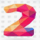

red


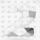

blue


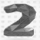

green


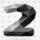

In [131]:
print('higher intensity means lighter grey in grey scale\n')
print('orig')
display(Image.open(image_file))
im2 = Image.new('L', (w,h))
print('red')
im2.putdata(red)
display(im2)
print('blue')
im2.putdata(blue)
display(im2)
print('green')
im2.putdata(green)
display(im2)

### pixel extraction in python

In [120]:
py_flat_pixels = np.array(img).flatten().tolist()
print((int)(len(flat_pixels)/4))
print(h)
print(w)
frame_size = h*w
print(frame_size)
red = flat_pixels[0:frame_size-1]
green = flat_pixels[frame_size:(frame_size*2)-1]
blue = flat_pixels[(frame_size*2):(frame_size*3)-1]
alpha = flat_pixels[(frame_size*3):(frame_size*4)-1]
flat_pixels[0:10]

225
40
40
1600


[235, 237, 239, 255, 234, 235, 238, 255, 240, 243]

## Max Pooling Convolution of Single Channel with 2 x 2 Kernel

### Python Max Pooling Convolution

Apply a 2x2 sliding window around image, starting at top-left, returning the max of those for pixels

In [317]:
def max_2x2_kernel(mat,w):
    h=(int)(len(mat)/w)
    new_image = list()
    for i,g in enumerate(mat):
        if i >= (w*(h-1)): 
            break
        if i!= 0 and (i+1) % w == 0:
            continue
        new_image.append(max(mat[i], mat[(i+1)] ,  mat[(i+w)],mat[(i+1+w)]))
    return new_image

In [318]:
max_2x2_kernel(mat=[1,2,3,4,5,6,7,8,9,10,11,12],w=4)

[6, 7, 8, 10, 11, 12]

In [319]:
print(len(green))
green_shrunk = max_2x2_kernel(mat=green,w=40)
print(len(green_shrunk))

1600
1521


### Visual Display - Py Max Pooling Convolution w/2x2 Kernel

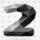

0


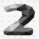

1


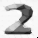

2


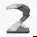

3


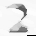

In [349]:
img = Image.new('L', (w,h))
img.putdata(green)
display(img)
data = green
for i in range(4):
    print(i)
    data = max_2x2_kernel(mat=data,w=40)
    img = Image.new('L', (w-i-1,h-i-1))
    img.putdata(data)
    display(img)
            

### Max Pooling Convolution Kernel on Single Channel - 2 x 2 Windowing - C++

3.3.1 Display Image  

3.3.2 **C++**    -> image flattend to int array pointer  

3.3.3 **Python** C++ pointer array to Python list  

3.3.4 **Python**  extract green channel  

3.3.5 **C++**    convolution : 2x2 max pool kernel  

3.3.6 **Numpy** flatten convolution

3.3.7 **Python**  flat convolution to image  

#### Display Image

/Users/Bhill/git/AI_From_Dirt/two.40x40.png PNG 40x40 40x40+0+0 8-bit sRGB 4817B 0.000u 0:00.000
height =  40
width =  40
color channels found =  3
channel size =  1600


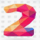

In [24]:
import ctypes
from ctypes import *
import numpy as np
from PIL import Image

image_file = '/Users/Bhill/git/AI_From_Dirt/two.40x40.png'
!identify {image_file}

height = !identify -format '%h' {image_file}
height = int(height[0])
print('height = ' , height)

width = !identify -format '%w' {image_file}
width = int(width[0])
print('width = ' , width)

channel_cnt = 3
print('color channels found = ', channel_cnt)

channel_size = width * height
print('channel size = ', channel_size)

orig = Image.open(image_file)
display(orig)

#### **C++**    -> image flattend to int array pointer 

In [25]:
get_data = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').get_data
get_data.restype = ctypes.POINTER(ctypes.c_int * (channel_size*channel_cnt))
result = get_data(image_file.encode())

#### **Python** C++ pointer array to Python list

In [26]:
bgr_pixels = np.ctypeslib.as_array(result,shape=(1,)).reshape((channel_size*channel_cnt)).tolist()

print(channel_size , ' channel size expected')
print(len(bgr_pixels),' pixels returned')
print((channel_size*channel_cnt), ' pixels expected')

1600  channel size expected
4800  pixels returned
4800  pixels expected


####  **Python** extract green channel

In [35]:
blue = list()
green = list()
red = list()
for i, bgr in enumerate(bgr_pixels):
    if i%channel_cnt is 0:
        blue.append(bgr)
    if i%channel_cnt is 1:
        green.append(bgr)
    if i%channel_cnt is 2:
        red.append(bgr)   

orig


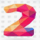

green channel


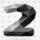

In [36]:
print('orig')
display(Image.open(image_file))
green_img = Image.new('L', (width,height))
print('green channel')
green_img.putdata(green)
display(green_img)

#### **C++**  convolution : 2x2 max pool kernel

In [37]:
"DO NOT RUN THIS CODE - JUST FOR SHOW - LOOKS BETTER IN CODE CELL THAN MARKUP CELL"
extern "C"
int *max_2x2_kernel(const int *mat, const int width, const int height) {

    int curr_ttl = width * height;
    vector<int> shrunk_vec;
    for (int i = 0; i < curr_ttl; i++) {
        if (i >= (width * (height - 1))) {
            break;
        }
        if (i != 0 and (i + 1) % width == 0) {
            continue;
        }
        vector<int> window{mat[i], mat[(i + 1)], mat[(i + width)], mat[(i + 1 + width)]};
        shrunk_vec.push_back(*std::max_element(window.begin(), window.end()));
    }

    return &shrunk_vec[0];
}
"DO NOT RUN THIS CODE - JUST FOR SHOW - LOOKS BETTER IN CODE CELL THAN MARKUP CELL"

SyntaxError: invalid syntax (<ipython-input-37-0e89fcbb51ec>, line 2)

In [38]:
import ctypes
from ctypes import *
import numpy as np

ptr_green = pointer((ctypes.c_int * len(green))(*green))

# int *max_2x2_kernel(const int *mat, const int width, const int height);
max_2x2_kernel = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').max_2x2_kernel
max_2x2_kernel.restype = ctypes.POINTER(ctypes.c_int * ((height-1)*(width-1)))
result = max_2x2_kernel(ptr_green,width,height)

#### **Numpy** flatten convolution

In [39]:
shrunk_frame_size = (height-1)*(width-1)
print(shrunk_frame_size)
green_channel_shunk = np.ctypeslib.as_array(result,shape=(1,)).reshape((shrunk_frame_size)).tolist()
len(green_channel_shunk)

1521


1521

#### **Python**  flat convolution to image  

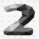

In [40]:
s_width = width-1
s_height = height-1
smaller = Image.new('L', (s_width,s_height))
smaller.putdata(green_channel_shunk)
display(smaller)

#### All together for fun

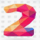

In [60]:
import ctypes
from ctypes import *
import numpy as np
from PIL import Image

image_file = '/Users/Bhill/git/AI_From_Dirt/two.40x40.png'
height = !identify -format '%h' {image_file}
height = int(height[0])
width = !identify -format '%w' {image_file}
width = int(width[0])
channel_cnt = 3
channel_size = width * height

orig = Image.open(image_file)
display(orig)

In [61]:
get_data = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').get_data
get_data.restype = ctypes.POINTER(ctypes.c_int * (channel_size*channel_cnt))
result = get_data(image_file.encode())
bgr_pixels = np.ctypeslib.as_array(result,shape=(1,)).reshape((channel_size*channel_cnt)).tolist()

green channel


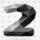

In [62]:
green = list()
for i, bgr in enumerate(bgr_pixels):
    if i%channel_cnt is 1:
        green.append(bgr)
green_img = Image.new('L', (width,height))
print('green channel')
green_img.putdata(green)
display(green_img)

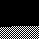

In [63]:
ptr_green = pointer((ctypes.c_int * len(green))(*green))

# int *max_2x2_kernel(const int *mat, const int width, const int height);
max_2x2_kernel = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').max_2x2_kernel
max_2x2_kernel.restype = ctypes.POINTER(ctypes.c_int * ((height-1)*(width-1)))
result = max_2x2_kernel(ptr_green,width,height)

shrunk_frame_size = (height-1)*(width-1)
green_channel_shunk = np.ctypeslib.as_array(result,shape=(1,)).reshape((shrunk_frame_size)).tolist()

s_width = width-1
s_height = height-1
smaller = Image.new('L', (s_width,s_height))
smaller.putdata(green_channel_shunk)
display(smaller)

### Even more all together

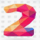

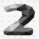

In [65]:
image_file = '/Users/Bhill/git/AI_From_Dirt/two.40x40.png'
orig = Image.open(image_file)
display(orig)
height = !identify -format '%h' {image_file}
height = int(height[0])
width = !identify -format '%w' {image_file}
width = int(width[0])
channel_cnt = 3
channel_size = width * height

get_data = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').get_data
get_data.restype = ctypes.POINTER(ctypes.c_int * (channel_size*channel_cnt))
bgr_pixels = np.ctypeslib.as_array(get_data(image_file.encode()),shape=(1,)).reshape((channel_size*channel_cnt)).tolist()

green = list()
for i, bgr in enumerate(bgr_pixels):
    if i%channel_cnt is 1:
        green.append(bgr)

ptr_green = pointer((ctypes.c_int * len(green))(*green))



shrunk_frame_size = (height-1)*(width-1)
max_2x2_kernel = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').max_2x2_kernel
max_2x2_kernel.restype = ctypes.POINTER(ctypes.c_int * ((height-1)*(width-1)))

green_channel_shunk = np.ctypeslib.as_array(max_2x2_kernel(ptr_green,width,height),shape=(1,)).reshape((shrunk_frame_size)).tolist()

s_width = width-1
s_height = height-1
smaller = Image.new('L', (s_width,s_height))
smaller.putdata(green_channel_shunk)
display(smaller)
